In [2]:
from sklearn import neighbors,tree
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import seaborn as sb

### Cargar el dataset

In [3]:
df = pd.read_csv('course_data_clean.csv')

In [4]:
df.head()

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0


In [5]:
df.describe()

,num_ratings,num_reviews,course_rating_int
count,14838.000000,14838.000000,14616.000000
mean,238.956733,45.831379,0.669540
std,308.523872,54.487423,0.470395
min,0.000000,1.000000,0.000000
25%,33.000000,7.000000,0.000000
50%,104.000000,22.000000,1.000000
75%,341.000000,66.000000,1.000000
max,2111.000000,253.000000,1.000000


### Hacer la limpieza del DataFrame 

In [6]:
# Eliminar columnas con mas de 10 valores unicos
df.drop(['course_code','course_title','reviews'],axis='columns',inplace=True)


In [7]:
# Convetir a valores numericos
df.useful = df.useful.str.rstrip('%').astype('float') / 100.0
df.easy = df.easy.str.rstrip('%').astype('float') / 100.0
df.liked = df.liked.str.rstrip('%').astype('float') / 100.0
df.course_rating = df.course_rating.map({'liked course':0, 'disliked course':1})

In [8]:
df.describe()

,num_ratings,useful,easy,liked,num_reviews,course_rating,course_rating_int
count,14838.000000,14836.000000,14835.000000,14835.000000,14838.000000,14616.000000,14616.000000
mean,238.956733,0.700547,0.595759,0.653960,45.831379,0.330460,0.669540
std,308.523872,0.230444,0.228301,0.215567,54.487423,0.470395,0.470395
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,0.570000,0.430000,0.520000,7.000000,0.000000,0.000000
50%,104.000000,0.770000,0.620000,0.670000,22.000000,0.000000,1.000000
75%,341.000000,0.870000,0.760000,0.810000,66.000000,1.000000,1.000000
max,2111.000000,1.000000,1.000000,1.000000,253.000000,1.000000,1.000000


In [9]:
# Rellenar valores null
df.useful = df.useful.fillna(df.useful.mean())
df.easy = df.easy.fillna(df.easy.mean())
df.liked = df.liked.fillna(df.liked.mean())
df.course_rating = df.course_rating.fillna(df.course_rating.mean())
df.course_rating = df.course_rating.round().astype(int)
df.course_rating_int = df.course_rating_int.fillna(df.course_rating_int.mean())

### Hacer un analisis para seleccionar que columna escoger

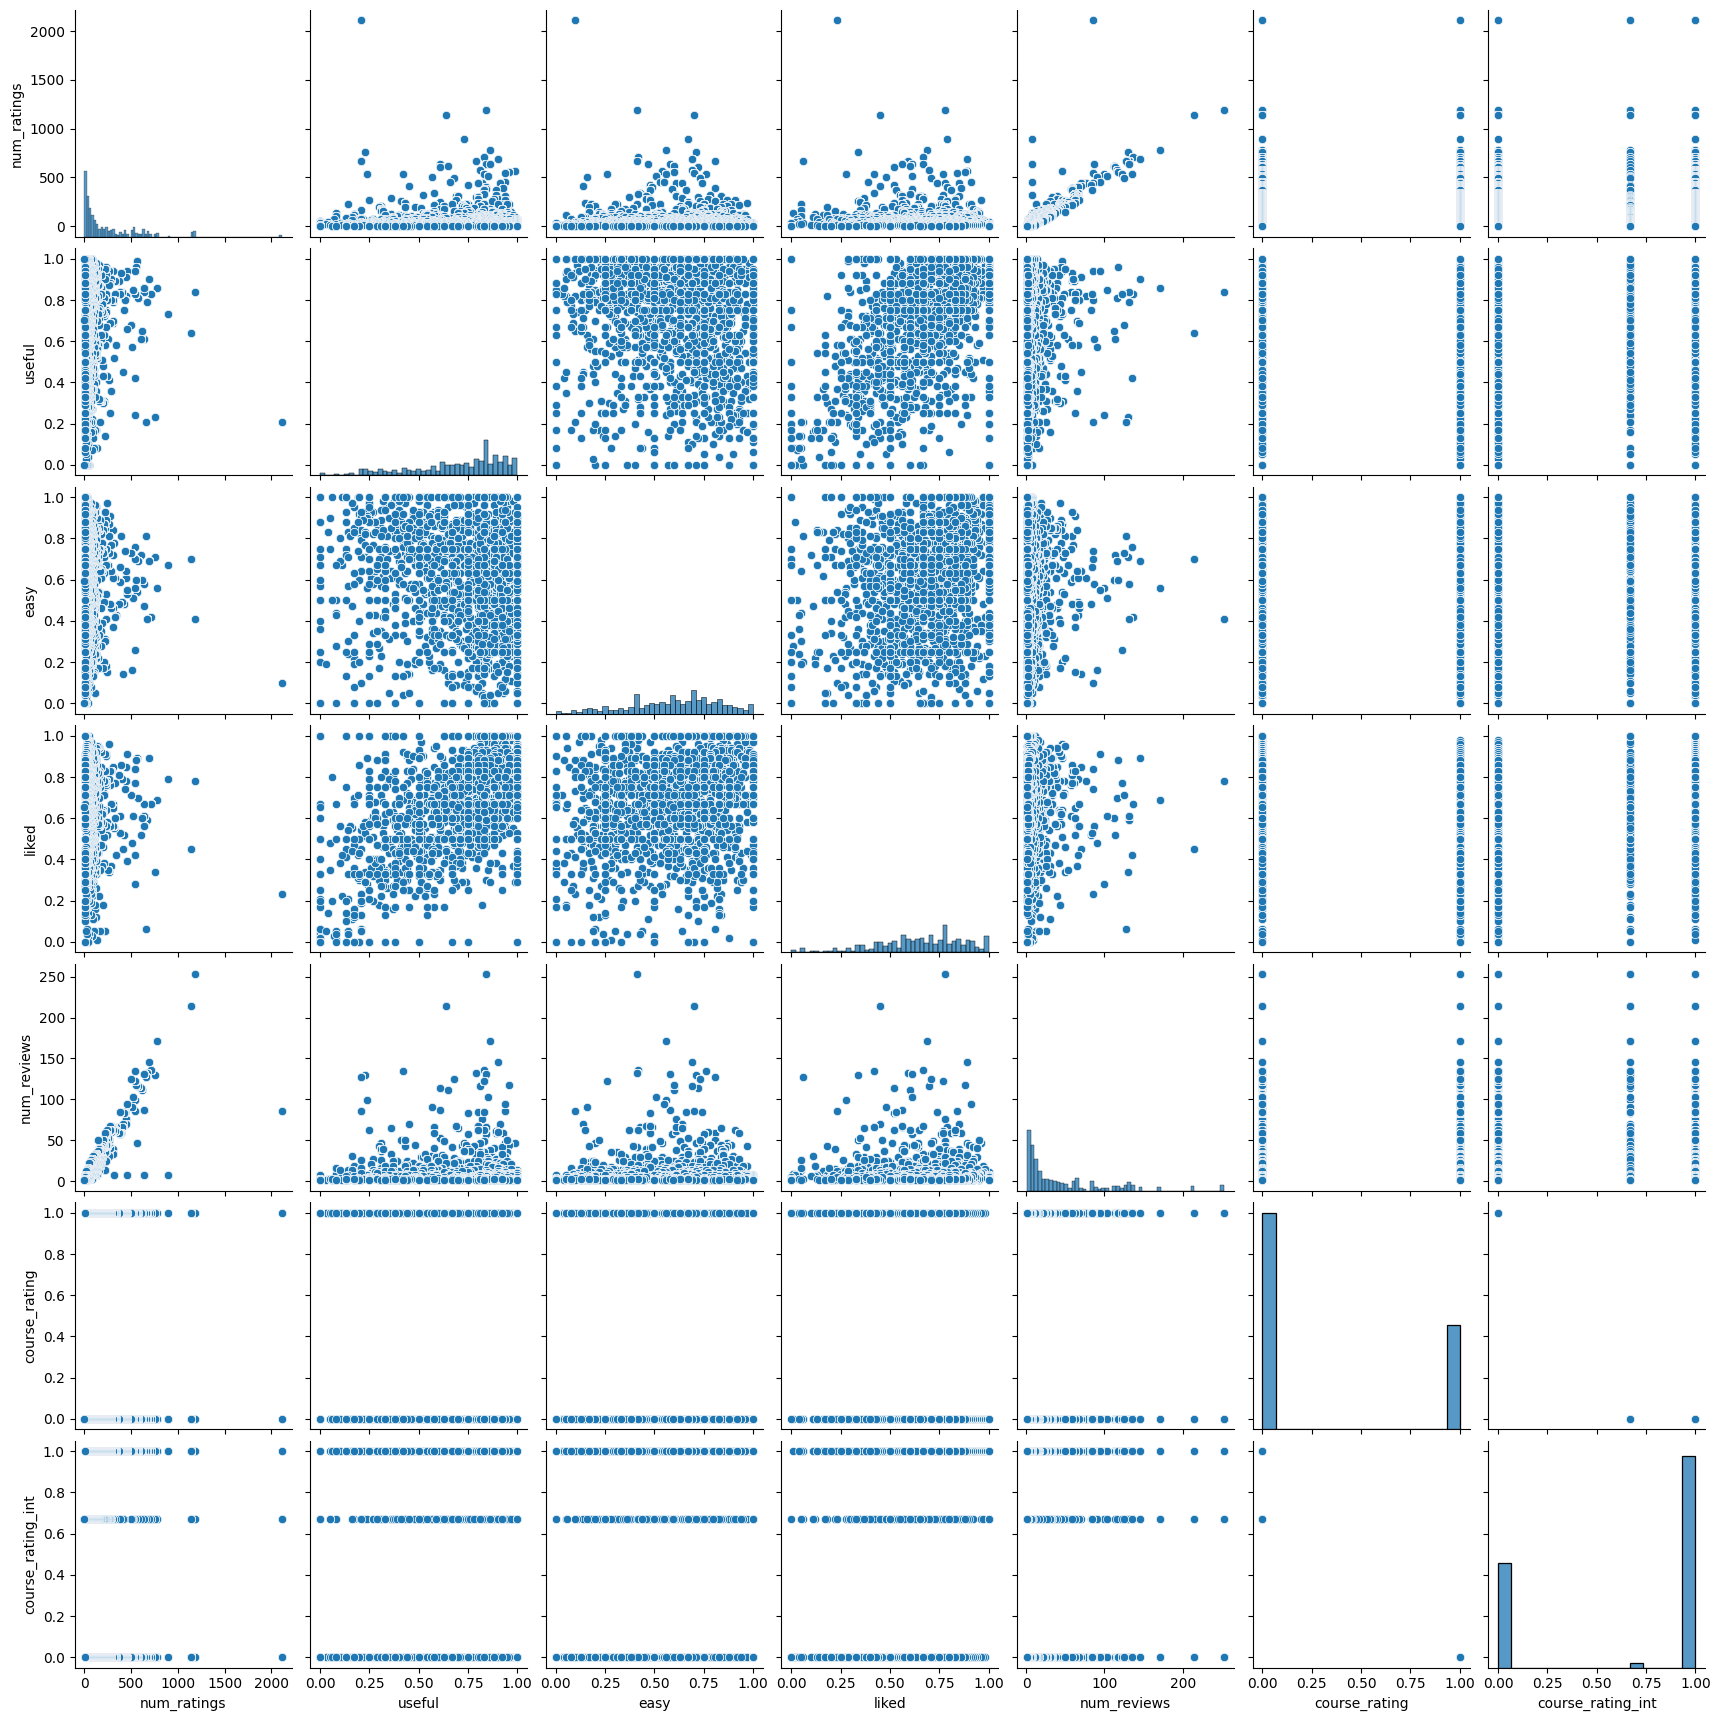

In [118]:
sb.pairplot(df)

### Preparamos la data

In [313]:
data_x = df.drop(['course_rating','course_rating_int'],axis='columns')
data_y = df.course_rating

train_x, test_x, train_y, test_y = train_test_split(data_x,data_y,test_size=0.1)

### Inicializamos los modelos

In [314]:
k_nearest_neighbors = neighbors.KNeighborsClassifier(n_neighbors=21)

In [315]:
decission_tree = tree.DecisionTreeClassifier()

### Entrenar los modelos

In [316]:
k_nearest_neighbors.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=21)

In [317]:
decission_tree.fit(train_x,train_y)

DecisionTreeClassifier()

In [318]:
print(f'El score es {round(k_nearest_neighbors.score(test_x,test_y)*100,2)}')

El score es 71.97


In [319]:
print(f'El score es {round(decission_tree.score(test_x,test_y)*100,2)}')

El score es 72.44


### Predecir

In [385]:
# vamos a predicir
num_ratings = 10
num_useful = 0.20
num_easy = 0.29
num_liked = 0.35
num_reviews = 86

course_rating_labels = {0:'curso que gustó', 1:'curso que no gustó'}

In [386]:
k_predicted = k_nearest_neighbors.predict([[num_ratings,num_useful,num_easy,num_liked,num_reviews]])

c:\Users\Alejandro\Documents\5to Semestre\Algoritmica Avanzada\practice 3 classifiers\modelos_clasificatorios_env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [387]:
d_predicted = decission_tree.predict([[num_ratings,num_useful,num_easy,num_liked,num_reviews]])

c:\Users\Alejandro\Documents\5to Semestre\Algoritmica Avanzada\practice 3 classifiers\modelos_clasificatorios_env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [388]:
# Visualizar la informacion
print(f'El curso con {num_ratings} ratings, {round(num_useful*100,2)}% util, {round(num_easy*100,2)}% facil, {round(num_liked*100,2)}% de apreciado y con {num_reviews} reseñas es un \n {course_rating_labels[k_predicted[0]]}')

El curso con 10 ratings, 20.0% util, 29.0% facil, 35.0% de apreciado y con 86 reseñas es un 
 curso que no gustó


In [389]:
print(f'El curso con {num_ratings}% de rating, {round(num_useful*100,2)}% util, {round(num_easy*100,2)}% facil, {round(num_liked*100,2)}% de apreciado y con {num_reviews} reseñas es un \n {course_rating_labels[d_predicted[0]]}')

El curso con 10% de rating, 20.0% util, 29.0% facil, 35.0% de apreciado y con 86 reseñas es un 
 curso que no gustó
